In [50]:
import numpy as np
import pandas as pd

In [51]:
path = "/kaggle/input/symptech-dataset/Appointment_TimeData.xlsx"

In [52]:
df = pd.read_excel(path, engine="openpyxl")

df.head()

,Provider ID,Patient ID,service_time,Visit Type_n,Patient Type,Gender,Age,Refill/Referral,Vision,Annual Exam,...,Chronic_Count,C_Asthma,C_Alcoholic,C_Anxiety,C_Blood Pressure,C_Heart Problem,C_Smoker,C_ Seizures,C_Learning Disability,F_anxiety
0,7018,118782558,27,PC VISIT,0,F,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7018,163281546,24,PC SAME DAY,0,M,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6945,81916344,23,PC VISIT,0,F,44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6945,79547760,36,PC VISIT,0,M,30,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,6945,81286812,40,PC VISIT,0,M,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df["service_time"]
x1 = df.drop("service_time", axis = "columns")
x2 = x1.drop("Gender", axis = "columns")
x3 = x2.drop("#ofvaccsin_n", axis = "columns")
x = x3.drop("Visit Type_n", axis = "columns")

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [55]:
print(len(x_train))
print(len(x_test))

4876
1220


In [56]:
neighbors = np.arange(1,51)
print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [57]:
testing_accuracies = np.empty(len(neighbors))

In [58]:
from sklearn.neighbors import KNeighborsClassifier

for index, neighbor_count in enumerate(neighbors):
    model = KNeighborsClassifier(n_neighbors = neighbor_count)
    model.fit(x_train, y_train)
    testing_accuracies[index] = model.score(x_test, y_test)

Text(0, 0.5, 'Testing Accuracy')

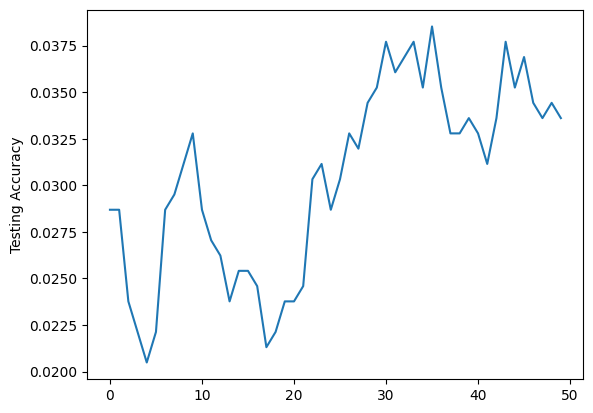

In [59]:
import matplotlib.pyplot as plt

plt.plot(testing_accuracies)
plt.ylabel("Number of Neighbors")
plt.ylabel("Testing Accuracy")

In [60]:
final_model = KNeighborsClassifier(n_neighbors = 28)
final_model.fit(x_train, y_train)
print(final_model.score(x_test, y_test) * 100)

3.1967213114754096
